# Microsoft Malware Challenge
## For CSCE 633 Machine Learning, Spring 2019, Course project
### Team: MARTHA
### Author: Rose Lin

This is the very first notebook in the series. The goal is to do some exploratory data analysis (EDA), to get a better sense about the underlying data. The focus would be at a macro level, and we are trying to get as much visualization done as possible.

~Ongoing efforts, your feedback is appreciated!~

In [1]:
# load the data from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(r"/content/gdrive/My Drive/Coding experiment/MARTHA/data"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


In [0]:
# from https://www.kaggle.com/theoviel/load-the-totality-of-the-data
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
# load the data
train = pd.read_csv("/content/gdrive/My Drive/Coding experiment/MARTHA/data/train.csv",dtype = dtypes)
ID_col = train['MachineIdentifier']
train.drop('MachineIdentifier', axis=1, inplace=True)
# take a look at the head
train.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,1.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [5]:
# Basic summary statistics
train.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8889165.0,8.921483e+06,433438.0,8.885262e+06,8885262.0,8885262.0,8.921483e+06,8.921483e+06,8.596074e+06,...,8.761350e+06,8.921483e+06,3.261780e+06,8.905530e+06,8.921483e+06,8.921483e+06,8850140.0,8618032.0,8618032.0,8.921483e+06
mean,7.509962e-06,NaN,1.733378e-02,NaN,4.948320e+04,NaN,NaN,9.879711e-01,1.080490e+02,8.049152e+04,...,3.268055e+04,4.860229e-01,2.980232e-07,7.202148e-03,1.255431e-01,3.807091e-02,NaN,NaN,NaN,4.997927e-01
std,2.740421e-03,0.0,1.305118e-01,NaN,1.379994e+04,0.0,0.0,1.090149e-01,6.304706e+01,4.873461e+04,...,2.112612e+04,4.998046e-01,5.459785e-04,8.453369e-02,3.313338e-01,1.913675e-01,0.0,0.0,0.0,5.000000e-01
min,0.000000e+00,0.0,0.000000e+00,1.0,3.000000e+00,0.0,0.0,0.000000e+00,1.000000e+00,5.000000e+00,...,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.000000e+00
25%,0.000000e+00,7.0,0.000000e+00,788.0,4.948000e+04,1.0,1.0,1.000000e+00,5.100000e+01,3.682500e+04,...,1.315600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,3.0,0.000000e+00
50%,0.000000e+00,7.0,0.000000e+00,1632.0,5.344700e+04,1.0,1.0,1.000000e+00,9.700000e+01,8.237300e+04,...,3.307000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,10.0,0.000000e+00
75%,0.000000e+00,7.0,0.000000e+00,2372.0,5.344700e+04,2.0,1.0,1.000000e+00,1.620000e+02,1.237000e+05,...,5.243600e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.0,11.0,1.000000e+00
max,1.000000e+00,35.0,1.000000e+00,3212.0,7.050700e+04,7.0,5.0,1.000000e+00,2.220000e+02,1.679620e+05,...,7.210500e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,15.0,1.000000e+00


In [6]:
# Also check # of features available
train.shape

(8921483, 82)

In [0]:
#@title Default title text
# tweak from https://www.kaggle.com/jiegeng94/everyone-do-this-at-the-beginning
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            try:
                c_min = df[col].min()
                c_max = df[col].max()
            except TypeError:
                df[col] = df[col].astype('category')
                continue
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

%time
train = reduce_mem_usage(train)

So we have 81 features (1 column for ID, 1 column for response) and 8 millions rows in total for training. Dropping the ID column for now since it serves as the primary key and won't help as a feature.

Before moving on... how about checking NANs?

# NULL value check

In [7]:
# Nan Values
null_counts = train.isnull().sum()/train.shape[0]
print(null_counts)
print("Columns with at least 1 NA:",null_counts[null_counts > 0].index)
print("Count:",len(null_counts[null_counts > 0].index))

ProductName                                0.000000
EngineVersion                              0.000000
AppVersion                                 0.000000
AvSigVersion                               0.000000
IsBeta                                     0.000000
RtpStateBitfield                           0.003622
IsSxsPassiveMode                           0.000000
DefaultBrowsersIdentifier                  0.951416
AVProductStatesIdentifier                  0.004060
AVProductsInstalled                        0.004060
AVProductsEnabled                          0.004060
HasTpm                                     0.000000
CountryIdentifier                          0.000000
CityIdentifier                             0.036475
OrganizationIdentifier                     0.308415
GeoNameIdentifier                          0.000024
LocaleEnglishNameIdentifier                0.000000
Platform                                   0.000000
Processor                                  0.000000
OsVer       

Ouch. 44 out of 81 features have missing values issue. We will need to come up with a way to handle this (rather than just throw away all the data with no record).

Plus, the following 7 columns might be safely excluded (since they are mostly NANs):

* DefaultBrowsersIdentifier
* PuaMode
* Census_ProcessorClass
* Census_InternalBatteryType
* Census_IsFlightingInternal
* Census_ThresholdOptIn
* Census_IsWIMBootEnabled

In [8]:
half_nans = null_counts[null_counts > 0.5].index
print("Columns that are half NANs:")
for c in half_nans:
    print("Name:",c,", NAN ratio:",null_counts[c])
print("Total count of half NAN columns:",len(null_counts[null_counts > 0.5].index))

Columns that are half NANs:
Name: DefaultBrowsersIdentifier , NAN ratio: 0.9514163732644001
Name: PuaMode , NAN ratio: 0.9997411865269485
Name: Census_ProcessorClass , NAN ratio: 0.9958940682843872
Name: Census_InternalBatteryType , NAN ratio: 0.7104680914596823
Name: Census_IsFlightingInternal , NAN ratio: 0.8304402978742436
Name: Census_ThresholdOptIn , NAN ratio: 0.635244723326828
Name: Census_IsWIMBootEnabled , NAN ratio: 0.6343903810610859
Total count of half NAN columns: 7


In [9]:
train.drop(half_nans, axis=1, inplace=True)
print(train.columns.values)

['ProductName' 'EngineVersion' 'AppVersion' 'AvSigVersion' 'IsBeta'
 'RtpStateBitfield' 'IsSxsPassiveMode' 'AVProductStatesIdentifier'
 'AVProductsInstalled' 'AVProductsEnabled' 'HasTpm' 'CountryIdentifier'
 'CityIdentifier' 'OrganizationIdentifier' 'GeoNameIdentifier'
 'LocaleEnglishNameIdentifier' 'Platform' 'Processor' 'OsVer' 'OsBuild'
 'OsSuite' 'OsPlatformSubRelease' 'OsBuildLab' 'SkuEdition' 'IsProtected'
 'AutoSampleOptIn' 'SMode' 'IeVerIdentifier' 'SmartScreen' 'Firewall'
 'UacLuaenable' 'Census_MDC2FormFactor' 'Census_DeviceFamily'
 'Census_OEMNameIdentifier' 'Census_OEMModelIdentifier'
 'Census_ProcessorCoreCount' 'Census_ProcessorManufacturerIdentifier'
 'Census_ProcessorModelIdentifier' 'Census_PrimaryDiskTotalCapacity'
 'Census_PrimaryDiskTypeName' 'Census_SystemVolumeTotalCapacity'
 'Census_HasOpticalDiskDrive' 'Census_TotalPhysicalRAM'
 'Census_ChassisTypeName'
 'Census_InternalPrimaryDiagonalDisplaySizeInInches'
 'Census_InternalPrimaryDisplayResolutionHorizontal'
 'Ce

Now that we have eliminated 7 columns that are deemed to be mostly empty, how about the categorical columns? In order to process them, encoding is necessary.

In [10]:
# more conversion: encode categorical variable to be numerical.
cate_cols = train.select_dtypes(include='category').columns.tolist()
print(cate_cols)
for c in cate_cols:
    print(train[c].value_counts())
    print("")
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#for col in cate_cols:
#    print("Processing",col)
#    train[col] = le.fit_transform(train[col])

['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']
win8defender     8826520
mse                94873
mseprerelease         53
scep                  22
windowsintune          8
fep                    7
Name: ProductName, dtype: int64

1.1.15200.1    3845067
1.1.15100.1    3675915
1.1.15000.2     265218
1.1.14901.4     212408
1.1.14600.4     160585
1.1.14800.3     136476
1.1.15300.6     120295
1.1.14104.0      93926
1.1.13504.0      70645
1.1.15300.5      68716
1.1.14700.5      46777
1.1.14500.5      458

Seems that the following variables would require further cleanup:
* SmartScreen (e.g. "Off", "OFF" and "off" are deemed to be different)
* Census_ChassisTypeName ("UNKNOWN" vs "Unknown")
* (I personally have concerns for "UNKNOWN" and "Unspecified" in *Census_PrimaryDiskTypeName*, but not processed it now)

In [11]:
# more cleanup on the categorical data before moving on
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NotExist'
}
train.replace({'SmartScreen': trans_dict}, inplace=True)

trans_dict = {"HandHeld":"Handheld","UNKNOWN":"Unknown",np.nan:"NoExist"}
train.replace({'Census_ChassisTypeName': trans_dict}, inplace=True)
print(train['SmartScreen'].value_counts())
print("")
print(train['Census_ChassisTypeName'].value_counts())

RequireAdmin    4316194
NotExist        3177011
ExistsNotSet    1046183
Off              187907
Warn             135484
Prompt            34536
Block             22533
On                  878
2                   416
1                   335
0                     4
Enabled               1
3                     1
Name: SmartScreen, dtype: int64

Notebook               5248812
Desktop                1872125
Laptop                  685581
Portable                360903
AllinOne                204295
MiniTower                85127
Convertible              84472
Unknown                  77223
Other                    75782
Detachable               51466
LowProfileDesktop        50072
Handheld                 46009
SpaceSaving              29070
Tablet                   13630
Tower                    12549
MainServerChassis         9545
MiniPC                    4433
LunchBox                  3971
RackMountChassis          3410
SubNotebook                807
BusExpansionChassis        720
NoEx

In [0]:
train['SmartScreen'] = train['SmartScreen'].astype('category')
train['Census_ChassisTypeName'] = train['Census_ChassisTypeName'].astype('category')

In [0]:
cate_cols_orig = train[cate_cols] # save a copy
train[cate_cols] = train[cate_cols].apply(lambda x: x.cat.codes)

Another concern naturally arises: is it possible that the data contains duplicate machine IDs to capture the same machine at different times? A duplicate check on ID is necessary.

# Duplicate check

In [16]:
#@title Default title text
# identify duplicate rows in the original dataframe
count = 0
for index, row in ID_col.duplicated().items():
    if row is True:
        print(index, row)
        count += 1
print("There are",count,"duplicated records in total.")

There are 0 duplicated records in total.


Looks like we are lucky enough - no duplicate exists, every row accounts for an entirely new machine.

Before performing any feature engineering, let's see if we can make sense of each given variable. (Looks like explicit time is not given, but can be inferred from some features as suggested by other kernels)
# Visualization

## Correlation between variables check

Inspired by [this notebook](https://www.kaggle.com/jiegeng94/everyone-do-this-at-the-beginning), we might be able to eliminate some features from the very beginning.

75
Column name: ProductName , data type: int8
Column name: EngineVersion , data type: int8
Column name: AppVersion , data type: int8
Column name: AvSigVersion , data type: int16
Column name: IsBeta , data type: int8
Column name: RtpStateBitfield , data type: float16
Column name: IsSxsPassiveMode , data type: int8
Column name: AVProductStatesIdentifier , data type: float32
Column name: AVProductsInstalled , data type: float16
Column name: AVProductsEnabled , data type: float16


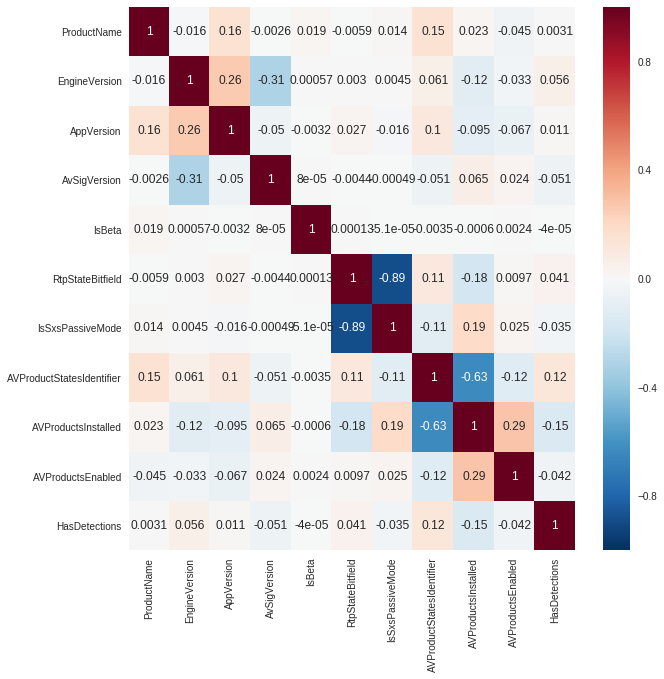

In [17]:
cols = train.columns.tolist()
print(len(cols))
co_cols = cols[:10]
for c in co_cols:
    print("Column name:",c,", data type:",train[c].dtypes)
co_cols.append('HasDetections')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

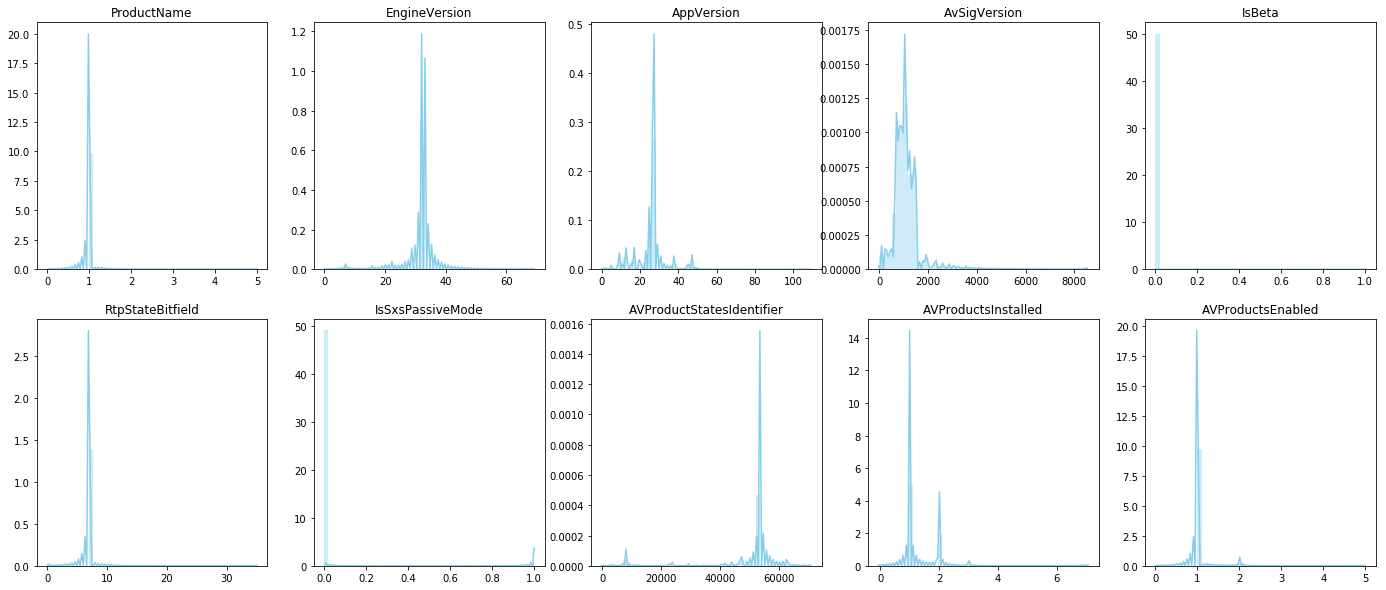

In [0]:
# plot
f, axes = plt.subplots(2, 5, figsize=(24, 10), sharex=False)
count = 0
for row in range(2):
    for col in range(5):
        sns.distplot(train[np.isfinite(train[co_cols[count]])][co_cols[count]].values, color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        count += 1

In [0]:
print(train.groupby('RtpStateBitfield').size())
print("Note: number of NANs:",train['RtpStateBitfield'].isnull().sum())
print("")
print(train.groupby('IsSxsPassiveMode').size())
print("Note: number of NANs:",train['IsSxsPassiveMode'].isnull().sum())

RtpStateBitfield
0.0      190701
1.0        1625
3.0        3029
5.0       20328
7.0     8651487
8.0       21974
35.0         21
dtype: int64
Note: number of NANs: 32318

IsSxsPassiveMode
0    8766840
1     154643
dtype: int64
Note: number of NANs: 0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


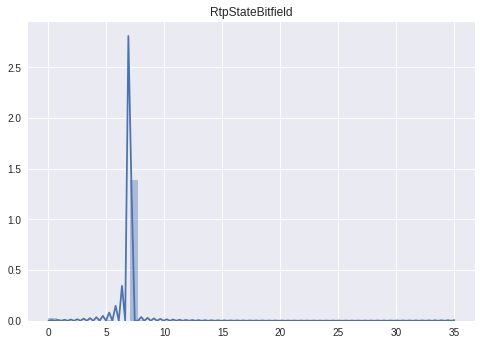

In [0]:
# a little bit visualization here
sns.distplot(train[np.isfinite(train['RtpStateBitfield'])]['RtpStateBitfield'].values).set_title('RtpStateBitfield');

In [0]:
def setCountOnTopOfBar(ax):
    for index in range(len(ax.axes[0])):
        for p in ax.axes[0][index].patches:
            height = p.get_height()
            ax.axes[0][index].text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height),
                    ha="center")

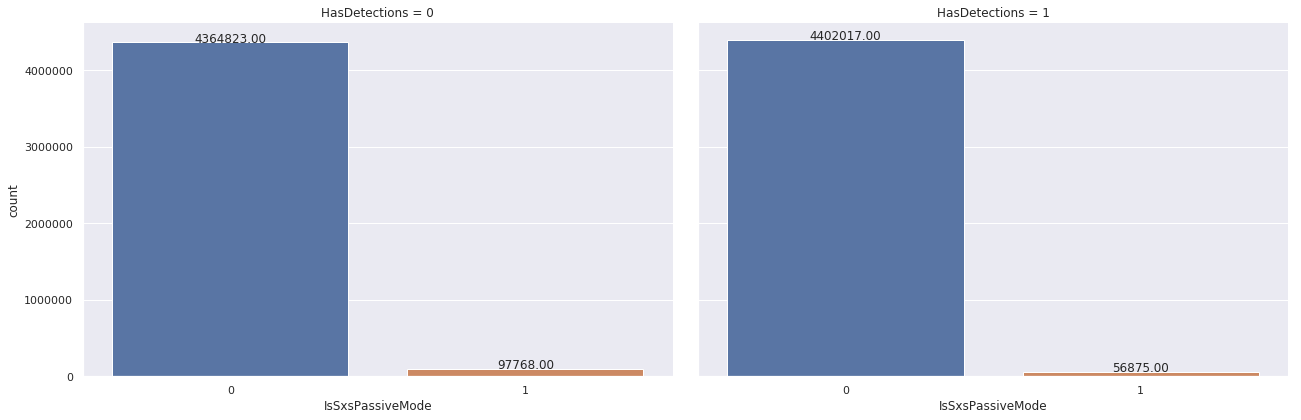

In [0]:
from matplotlib.pyplot import show

sns.set(style="darkgrid")

ax = sns.catplot(x="IsSxsPassiveMode", col="HasDetections",
                 data=train, kind="count",
                 height=6, aspect=1.5)
setCountOnTopOfBar(ax)
show()

*RtpStateBitfield* and *IsSxsPassiveMode* are correlated - remove *IsSxsPassiveMode* since it's less correlated with the response variable. (Note that they are both really skewed as well)

Column name: HasTpm , data type: int8
Column name: CountryIdentifier , data type: int16
Column name: CityIdentifier , data type: float32
Column name: OrganizationIdentifier , data type: float16
Column name: GeoNameIdentifier , data type: float16
Column name: LocaleEnglishNameIdentifier , data type: int8
Column name: Platform , data type: int8
Column name: Processor , data type: int8
Column name: OsVer , data type: int8
Column name: OsBuild , data type: int16


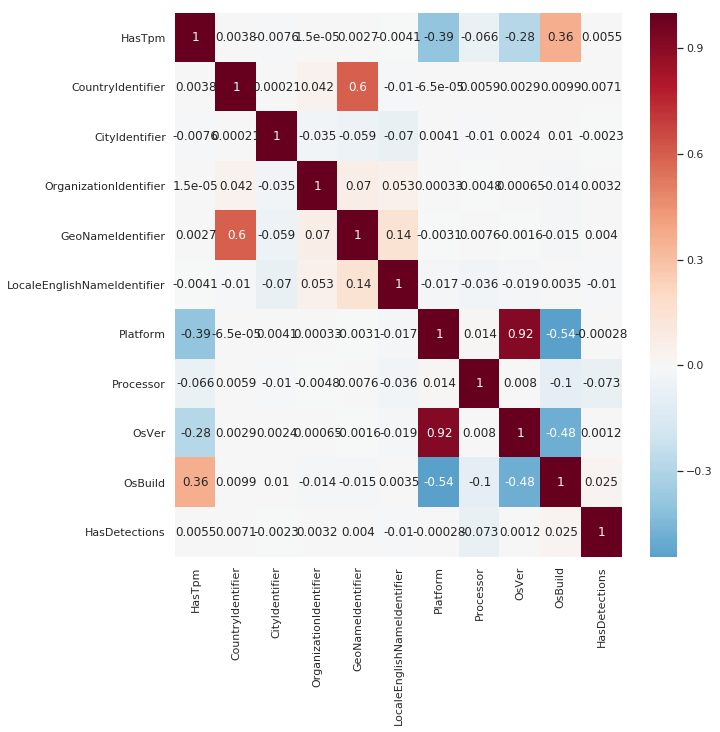

In [0]:
co_cols = cols[10:20]
for c in co_cols:
    print("Column name:",c,", data type:",train[c].dtypes)
co_cols.append('HasDetections')

plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:39: RuntimeWarning: overflow encountered in byte_scalars
  return int(np.ceil((a.max() - a.min()) / h))


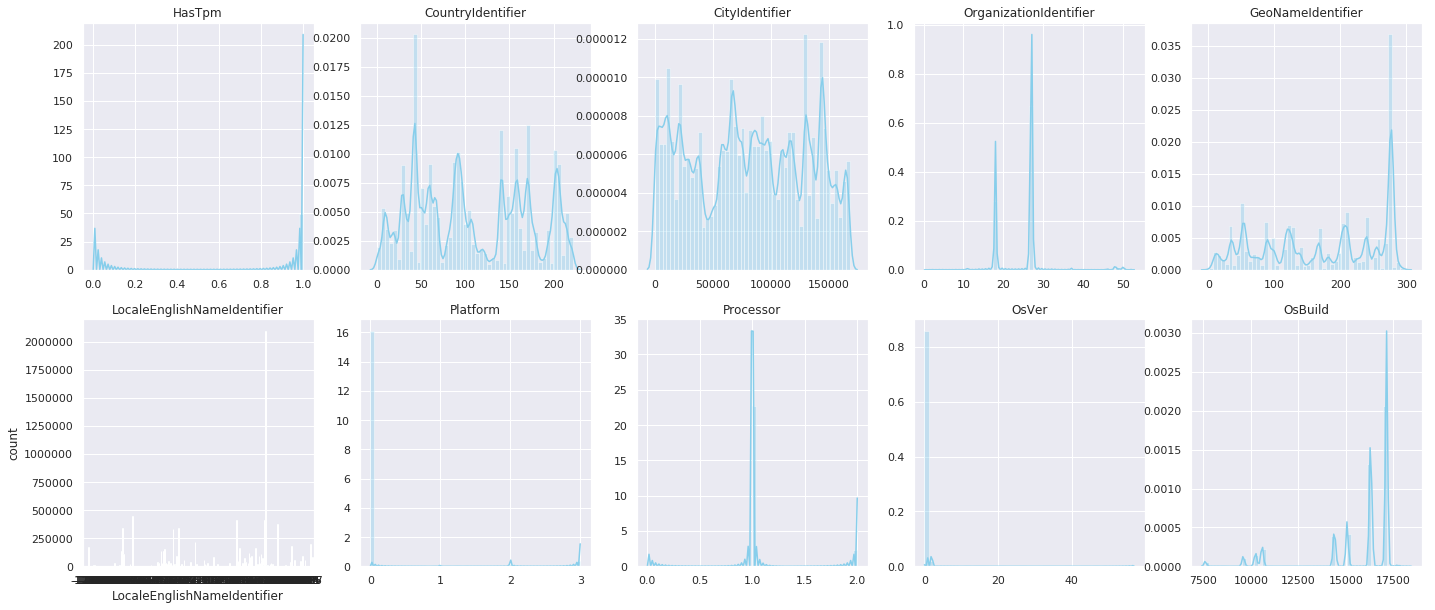

In [0]:
# plot
f, axes = plt.subplots(2, 5, figsize=(24, 10), sharex=False)
count = 0
for row in range(2):
    for col in range(5):
        try:
            sns.distplot(train[np.isfinite(train[co_cols[count]])][co_cols[count]].values, color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        except:
            sns.countplot(train[co_cols[count]], color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        count += 1

In [0]:
print(train.groupby('Platform').size())
print("Note: number of NANs:",train['Platform'].isnull().sum())
print("")
print(train.groupby('OsVer').size())
print("Note: number of NANs:",train['OsVer'].isnull().sum())

Platform
0    8618715
1      14371
2      93889
3     194508
dtype: int64
Note: number of NANs: 0

OsVer
0     8632545
1       93268
2      194447
3           3
4         582
5          30
6          22
7         225
8         141
9          23
10         30
11         12
12          5
13          1
14         24
15         11
16          4
17         15
18         18
19          3
20          2
21          2
22          2
23          1
24          6
25          1
26          1
27          1
28          1
29          9
30          1
31          1
32          2
33          1
34          1
35         10
36          1
37          1
38          5
39          1
40          1
41          2
42          2
43          3
44          2
45          1
46          1
47          1
48          2
49          1
50          1
51          1
52          1
53          1
54          1
55          1
56          1
57          1
dtype: int64
Note: number of NANs: 0


Text(0.5, 1.0, 'Platform')

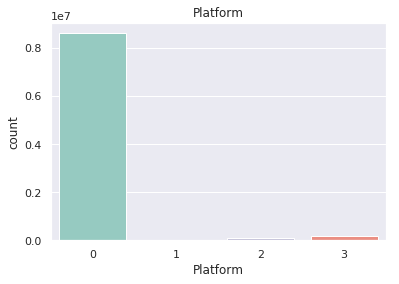

In [0]:
# a little bit visualization here
sns.countplot(train['Platform'],palette="Set3").set_title('Platform')

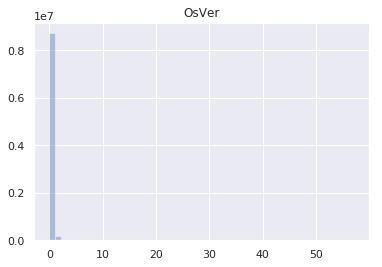

In [0]:
# a little bit visualization here
sns.distplot(train[np.isfinite(train['OsVer'])]['OsVer'].values,kde=False).set_title('OsVer');

In [0]:
print(cate_cols_orig['Platform'].cat.categories)
print(cate_cols_orig['OsVer'].cat.categories)

Index(['windows10', 'windows2016', 'windows7', 'windows8'], dtype='object')
Index(['10.0.0.0', '6.1.1.0', '6.3.0.0', '10.0.1.44', '6.1.0.0', '6.1.3.0',
       '6.3.1.0', '10.0.3.0', '10.0.1.0', '10.0.32.72', '10.0.2.0',
       '10.0.5.18', '10.0.0.1', '10.0.21.0', '6.3.3.0', '10.0.4.0',
       '10.0.80.0', '10.0.7.0', '10.0.5.0', '6.3.4.0', '10.0.32.0',
       '10.0.3.80', '10.0.2.86', '10.0.19.80', '10.0.16.36', '6.1.0.112',
       '10.0.5.117', '10.0.48.0', '6.3.16.0', '10.0.16.0', '10.0.1.144',
       '10.0.7.101', '6.1.7.0', '6.1.0.128', '10.0.0.96', '10.0.0.112',
       '10.0.0.22', '10.0.153.153', '10.0.8.0', '10.0.23.0', '6.3.0.16',
       '10.0.0.3', '6.3.5.0', '10.0.6.0', '6.1.2.0', '6.3.80.0', '6.1.6.0',
       '6.1.4.0', '6.3.32.72', '10.0.4.80', '6.1.16.36', '6.3.1.144',
       '6.3.0.2', '6.3.0.117', '10.0.0.2', '6.3.0.112', '10.0.0.80',
       '6.3.7.0'],
      dtype='object')


*Platform* and *OSVer* are correlated - remove *Platform* since it's less correlated with the response variable.

Note: in [this notebook](https://www.kaggle.com/jiegeng94/everyone-do-this-at-the-beginning) both variables are eliminated due to skewness. I personally **DON'T** like the idea of dropping features purely due to skewness. We could have done some tricks like log transformation described [here](https://becominghuman.ai/how-to-deal-with-skewed-dataset-in-machine-learning-afd2928011cc). So skewness won't be a metric to use to eliminate variables.

Column name: OsSuite , data type: int16
Column name: OsPlatformSubRelease , data type: int8
Column name: OsBuildLab , data type: int16
Column name: SkuEdition , data type: int8
Column name: IsProtected , data type: float16
Column name: AutoSampleOptIn , data type: int8
Column name: SMode , data type: float16
Column name: IeVerIdentifier , data type: float16
Column name: SmartScreen , data type: int8
Column name: Firewall , data type: float16


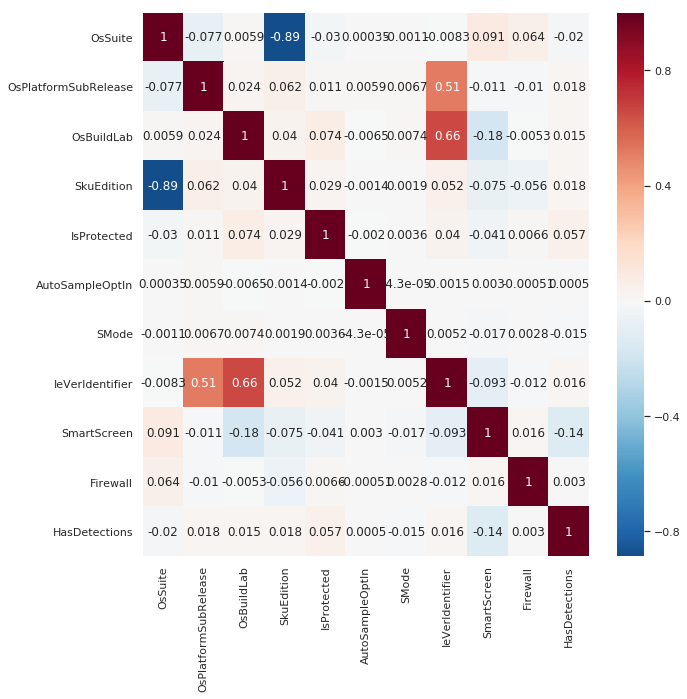

In [0]:
co_cols = cols[20:30]
for c in co_cols:
    print("Column name:",c,", data type:",train[c].dtypes)
co_cols.append('HasDetections')

plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

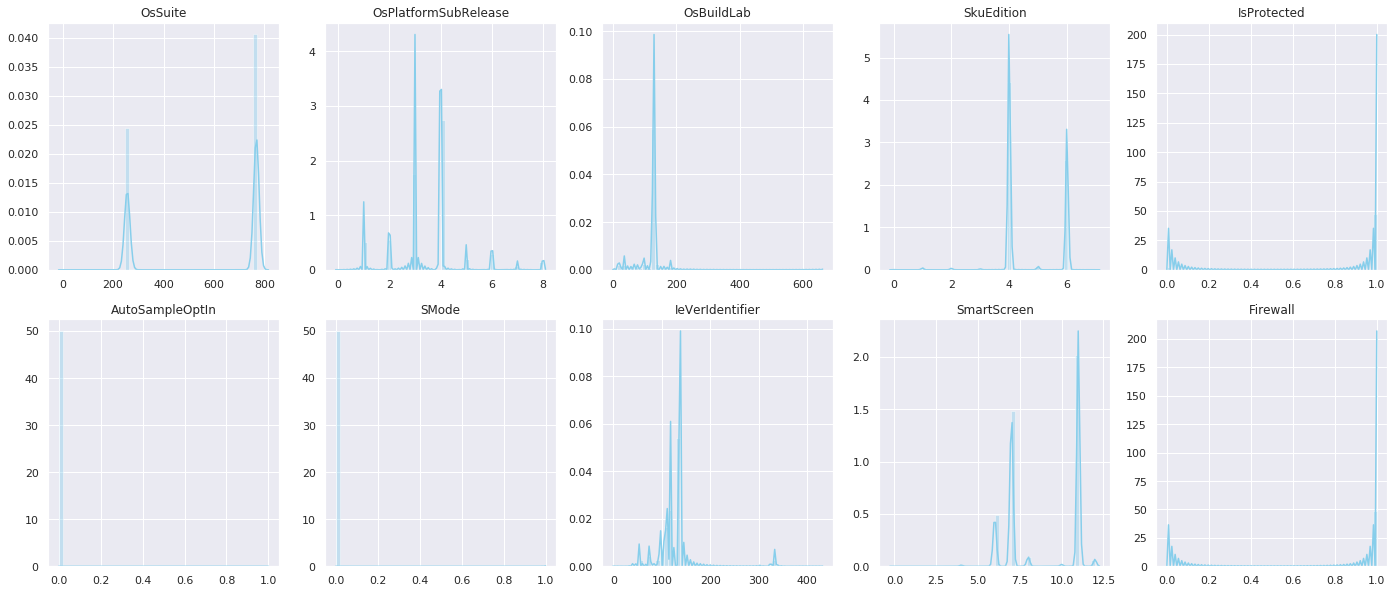

In [0]:
# plot
f, axes = plt.subplots(2, 5, figsize=(24, 10), sharex=False)
count = 0
for row in range(2):
    for col in range(5):
        try:
            sns.distplot(train[np.isfinite(train[co_cols[count]])][co_cols[count]].values, color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        except:
            sns.countplot(train[co_cols[count]], color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        count += 1

In [0]:
print(train.groupby('OsSuite').size())
print("Note: number of NANs:",train['OsSuite'].isnull().sum())
print("")
print(train.groupby('SkuEdition').size())
print("Note: number of NANs:",train['SkuEdition'].isnull().sum())

OsSuite
16         731
18           1
49          17
144         34
256    3346251
272      12092
274         39
305        662
307          2
400        793
402          1
528          1
768    5560661
784        198
dtype: int64
Note: number of NANs: 0

SkuEdition
0       5589
1      40694
2      34357
3      20702
4    5514341
5      78054
6    3224164
7       3582
dtype: int64
Note: number of NANs: 0


Text(0.5, 1.0, 'OsSuite')

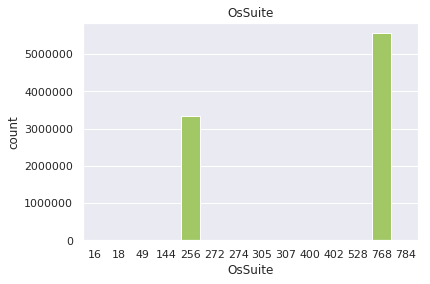

In [0]:
# a little bit visualization here
sns.countplot(train['OsSuite'],palette="Set2").set_title('OsSuite')

Text(0.5, 1.0, 'SkuEdition')

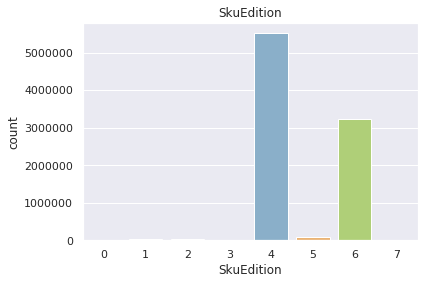

In [0]:
sns.countplot(train['SkuEdition'],palette="Set3").set_title('SkuEdition')

*OsSuite* and *SkuEdition* are correlated - remove *SkuEdition* since it's less correlated with the response variable (Or, should we? Both are categorical variables and now are represented in their numerical encodings. Is this the correct way to measure their correlations?)

Column name: UacLuaenable , data type: float32
Column name: Census_MDC2FormFactor , data type: int8
Column name: Census_DeviceFamily , data type: int8
Column name: Census_OEMNameIdentifier , data type: float16
Column name: Census_OEMModelIdentifier , data type: float32
Column name: Census_ProcessorCoreCount , data type: float16
Column name: Census_ProcessorManufacturerIdentifier , data type: float16
Column name: Census_ProcessorModelIdentifier , data type: float16
Column name: Census_PrimaryDiskTotalCapacity , data type: float32
Column name: Census_PrimaryDiskTypeName , data type: int8


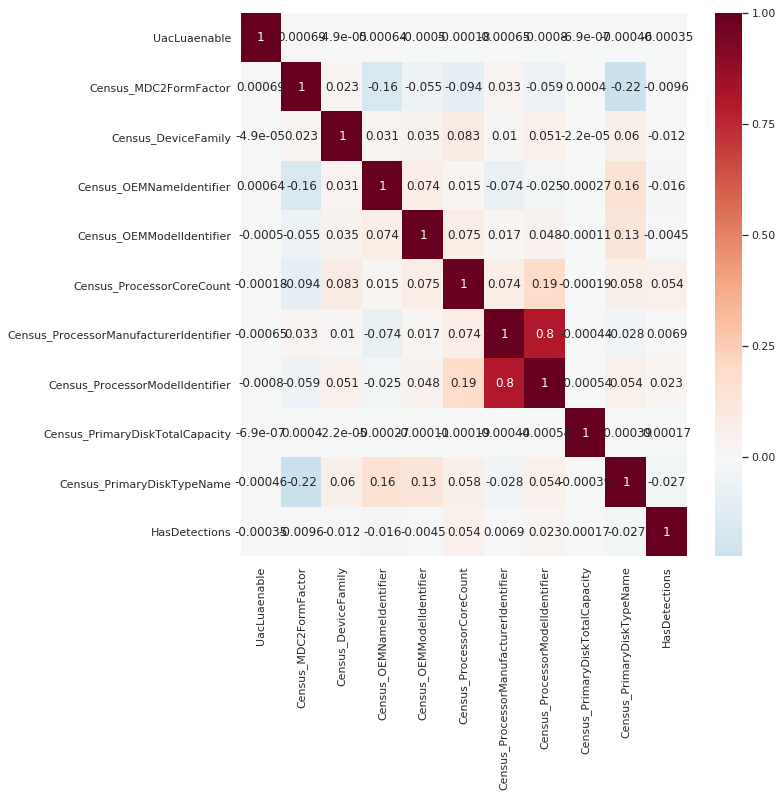

In [0]:
co_cols = cols[30:40]
for c in co_cols:
    print("Column name:",c,", data type:",train[c].dtypes)
co_cols.append('HasDetections')

plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

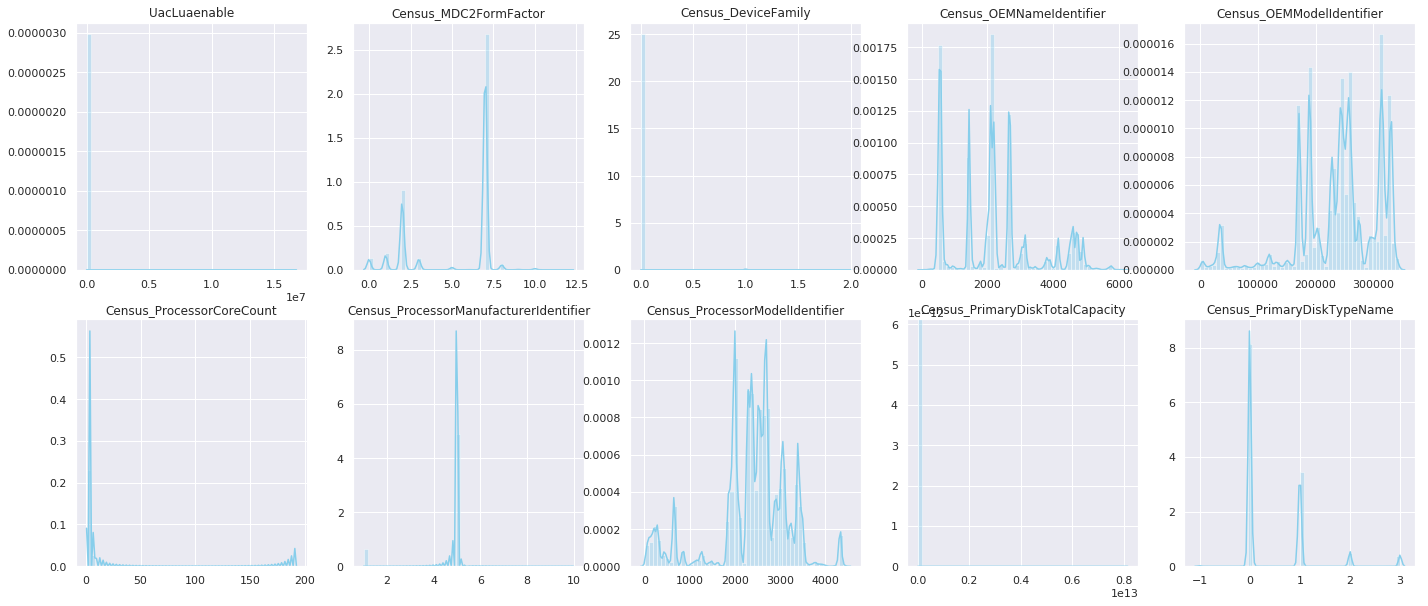

In [0]:
# plot
f, axes = plt.subplots(2, 5, figsize=(24, 10), sharex=False)
count = 0
for row in range(2):
    for col in range(5):
        try:
            sns.distplot(train[np.isfinite(train[co_cols[count]])][co_cols[count]].values, color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        except:
            sns.countplot(train[co_cols[count]], color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        count += 1

In [0]:
print(train.groupby('Census_ProcessorManufacturerIdentifier').size())
print("Note: number of NANs:",train['Census_ProcessorManufacturerIdentifier'].isnull().sum())
print("")
print(train.groupby('Census_ProcessorModelIdentifier').size())
print("Note: number of NANs:",train['Census_ProcessorModelIdentifier'].isnull().sum())

Census_ProcessorManufacturerIdentifier
1.0     1040292
3.0         218
4.0           1
5.0     7839318
7.0           1
9.0           1
10.0        339
dtype: int64
Note: number of NANs: 41313

Census_ProcessorModelIdentifier
2.0          1
3.0          7
6.0          2
7.0          3
10.0         1
15.0         1
17.0         1
19.0      1005
20.0         2
22.0         1
23.0       244
24.0         8
25.0       220
26.0         3
27.0        92
28.0         2
29.0      3945
30.0       354
31.0      2001
32.0       187
33.0         1
34.0      1156
35.0       140
36.0         1
37.0      6147
38.0       514
39.0      3989
40.0       477
41.0       955
42.0       116
          ... 
4348.0       8
4360.0      96
4364.0       3
4368.0      13
4372.0       9
4376.0      16
4380.0       3
4384.0       2
4388.0       1
4392.0       2
4400.0       2
4404.0    4418
4408.0     343
4412.0       1
4416.0      12
4420.0      10
4424.0      40
4428.0     121
4432.0     188
4436.0      92
4440.0    

Text(0.5, 1.0, 'Census_ProcessorManufacturerIdentifier')

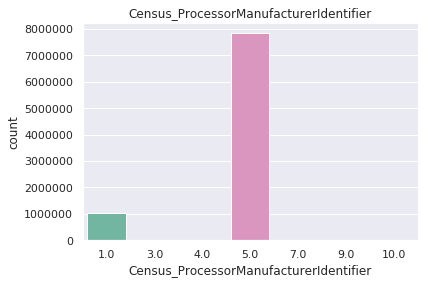

In [0]:
# a little bit visualization here
sns.countplot(train['Census_ProcessorManufacturerIdentifier'],palette="Set2").set_title('Census_ProcessorManufacturerIdentifier')

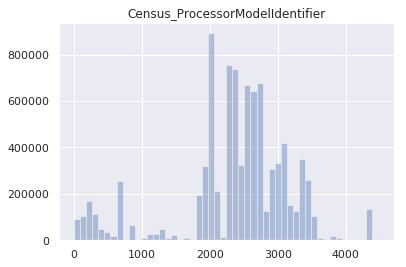

In [0]:
sns.distplot(train[np.isfinite(train['Census_ProcessorModelIdentifier'])]['Census_ProcessorModelIdentifier'].values,kde=False).set_title('Census_ProcessorModelIdentifier');

*Census_ProcessorManufacturerIdentifier* and *Census_ProcessorModelIdentifier* are correlated - remove *Census_ProcessorManufacturerIdentifier* since it's less correlated with the response variable (plus in a much finer grain).

Column name: Census_SystemVolumeTotalCapacity , data type: float32
Column name: Census_HasOpticalDiskDrive , data type: int8
Column name: Census_TotalPhysicalRAM , data type: float32
Column name: Census_ChassisTypeName , data type: int8
Column name: Census_InternalPrimaryDiagonalDisplaySizeInInches , data type: float16
Column name: Census_InternalPrimaryDisplayResolutionHorizontal , data type: float16
Column name: Census_InternalPrimaryDisplayResolutionVertical , data type: float16
Column name: Census_PowerPlatformRoleName , data type: int8
Column name: Census_InternalBatteryNumberOfCharges , data type: float32
Column name: Census_OSVersion , data type: int16


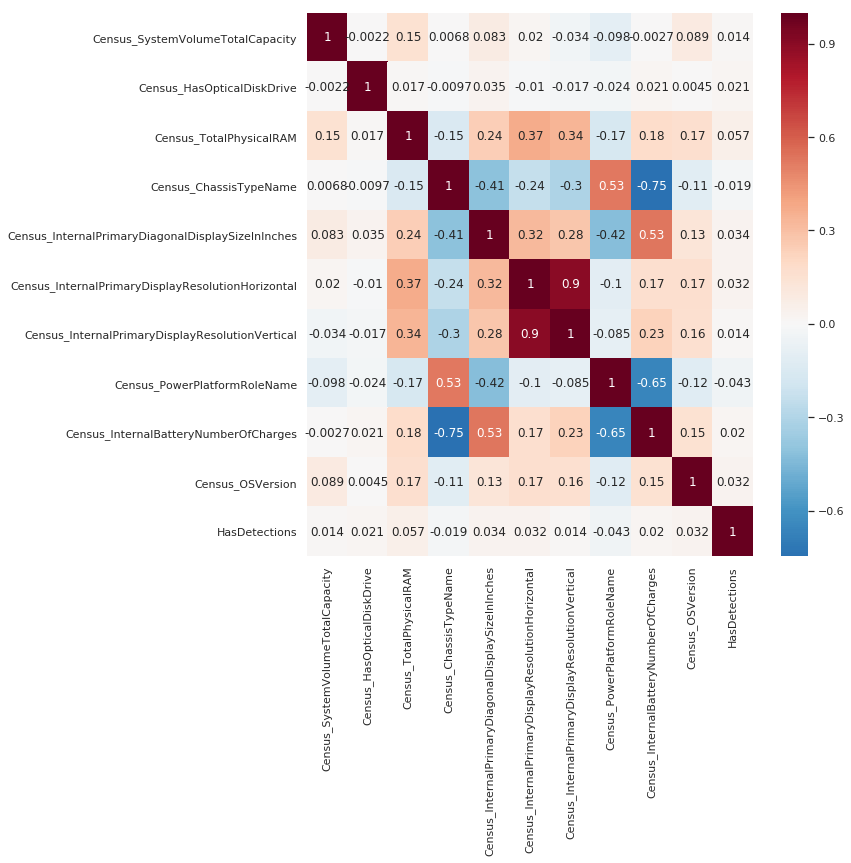

In [0]:
co_cols = cols[40:50]
for c in co_cols:
    print("Column name:",c,", data type:",train[c].dtypes)
co_cols.append('HasDetections')

plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

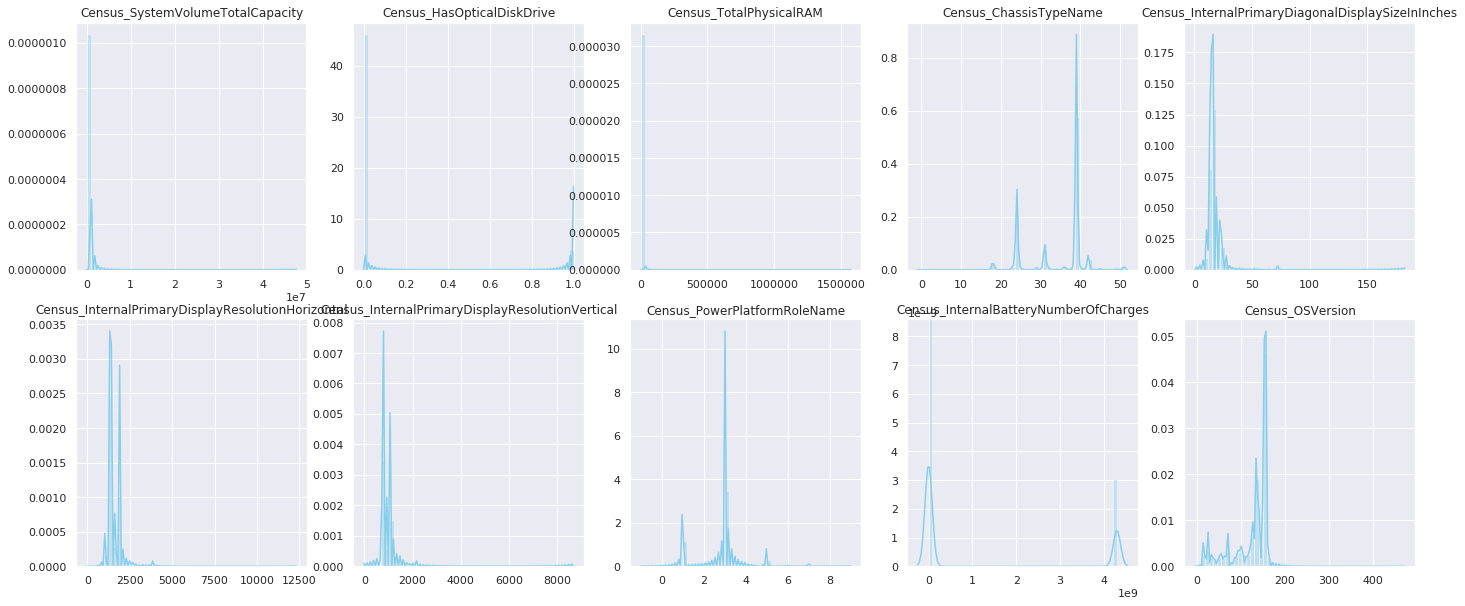

In [0]:
# plot
f, axes = plt.subplots(2, 5, figsize=(24, 10), sharex=False)
count = 0
for row in range(2):
    for col in range(5):
        try:
            sns.distplot(train[np.isfinite(train[co_cols[count]])][co_cols[count]].values, color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        except:
            sns.countplot(train[co_cols[count]], color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        count += 1

*Census_InternalPrimaryDisplayResolutionHorizontal* and *Census_InternalPrimaryDisplayResolutionVertical* are correlated - remove *Census_InternalPrimaryDisplayResolutionVertical* since it's less correlated with the response variable

Column name: Census_OSArchitecture , data type: int8
Column name: Census_OSBranch , data type: int8
Column name: Census_OSBuildNumber , data type: int16
Column name: Census_OSBuildRevision , data type: int32
Column name: Census_OSEdition , data type: int8
Column name: Census_OSSkuName , data type: int8
Column name: Census_OSInstallTypeName , data type: int8
Column name: Census_OSInstallLanguageIdentifier , data type: float16
Column name: Census_OSUILocaleIdentifier , data type: int16
Column name: Census_OSWUAutoUpdateOptionsName , data type: int8


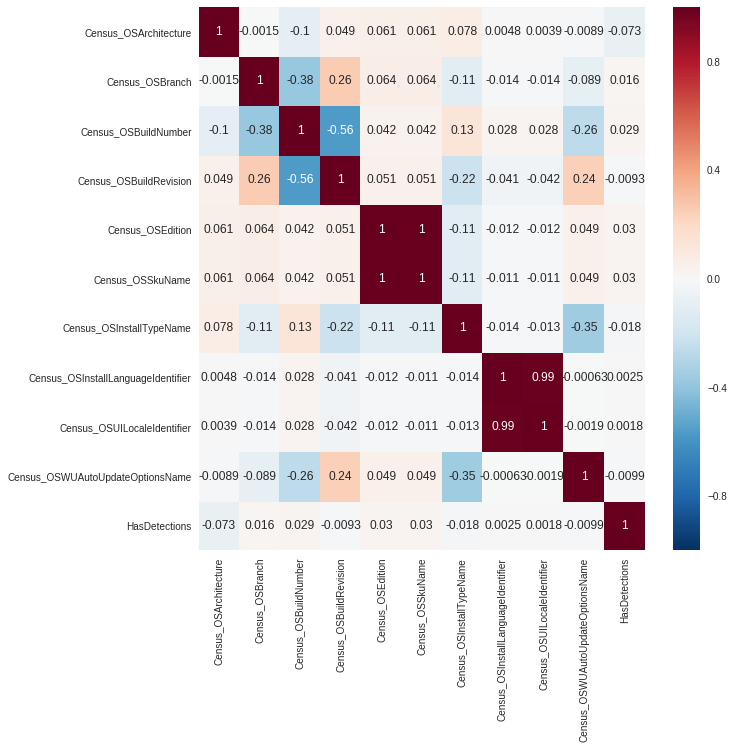

In [18]:
co_cols = cols[50:60]
for c in co_cols:
    print("Column name:",c,", data type:",train[c].dtypes)
co_cols.append('HasDetections')

plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


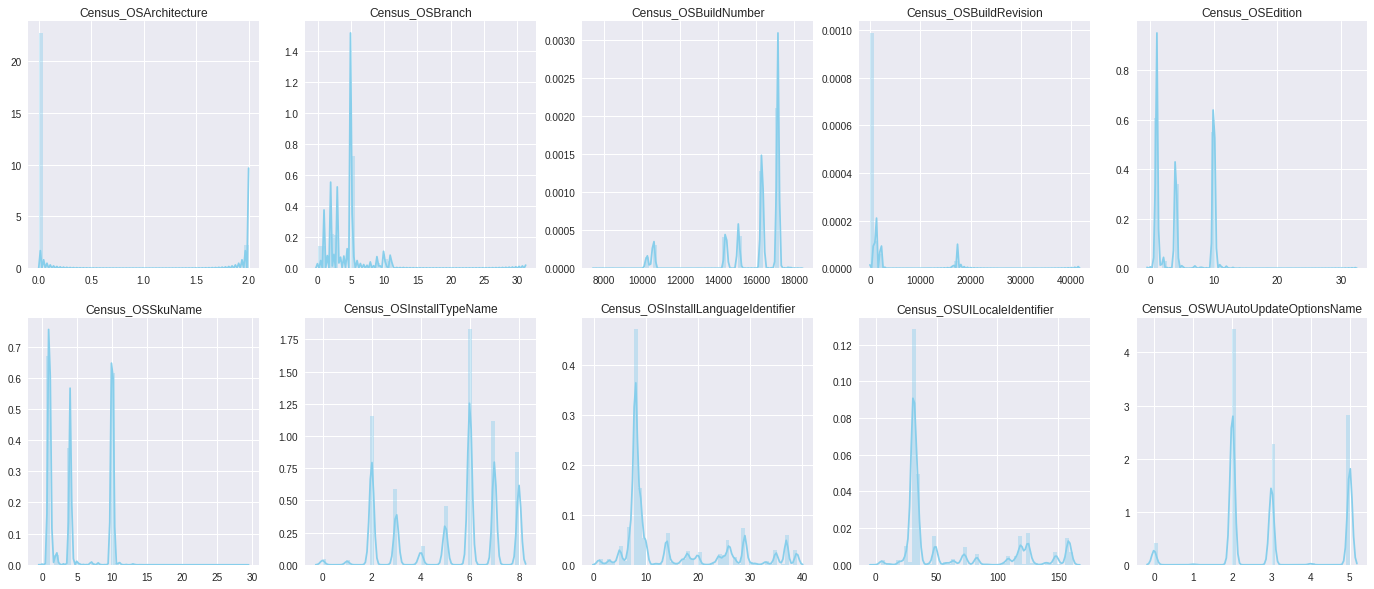

In [19]:
# plot
f, axes = plt.subplots(2, 5, figsize=(24, 10), sharex=False)
count = 0
for row in range(2):
    for col in range(5):
        try:
            sns.distplot(train[np.isfinite(train[co_cols[count]])][co_cols[count]].values, color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        except:
            sns.countplot(train[co_cols[count]], color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        count += 1

In [21]:
print(cate_cols_orig['Census_OSEdition'].cat.categories)
print(cate_cols_orig['Census_OSSkuName'].cat.categories)

Index(['Cloud', 'Core', 'CoreCountrySpecific', 'CoreN', 'CoreSingleLanguage',
       'Education', 'EducationN', 'Enterprise', 'EnterpriseS', 'EnterpriseSN',
       'Professional', 'ProfessionalEducation', 'ProfessionalN',
       'ServerStandard', 'ServerStandardEval', 'ServerDatacenterEval',
       'ProfessionalEducationN', 'ServerSolution', 'EnterpriseN',
       'ProfessionalWorkstationN', 'ProfessionalWorkstation', 'Ultimate',
       'CloudN', 'ProfessionalCountrySpecific', 'ServerRdsh',
       'ServerDatacenter', 'HomePremium', 'ProfessionalSingleLanguage',
       'ServerDatacenterACor', 'Pro', 'Enterprise 2015 LTSB', 'Home',
       'professional'],
      dtype='object')
Index(['CLOUD', 'CORE', 'CORE_COUNTRYSPECIFIC', 'CORE_N',
       'CORE_SINGLELANGUAGE', 'EDUCATION', 'EDUCATION_N', 'ENTERPRISE',
       'ENTERPRISE_S', 'ENTERPRISE_S_N', 'PROFESSIONAL', 'PROFESSIONAL_N',
       'STANDARD_EVALUATION_SERVER', 'STANDARD_SERVER',
       'DATACENTER_EVALUATION_SERVER', 'SB_SOLUTION_SERV

In [23]:
print(train['Census_OSInstallLanguageIdentifier'].value_counts())
print(train['Census_OSUILocaleIdentifier'].value_counts())

8.0     3179262
9.0     1034201
7.0      512753
29.0     492267
14.0     432503
37.0     403190
10.0     366636
26.0     334766
5.0      252887
35.0     204832
39.0     201525
18.0     190828
20.0     169059
24.0     142175
25.0     132408
27.0     108176
19.0      84177
17.0      83445
1.0       79777
3.0       72370
6.0       50489
33.0      48800
15.0      41514
4.0       35407
30.0      31956
23.0      29496
31.0      22149
12.0      19906
2.0       18270
16.0      15831
36.0      14585
28.0      12696
13.0      10869
34.0      10647
21.0       6865
32.0       4559
38.0       3737
11.0       3219
22.0       3167
Name: Census_OSInstallLanguageIdentifier, dtype: int64
31     3170824
34     1040042
30      513995
125     498236
49      436691
158     408118
35      377071
119     337988
26      252863
148     206854
160     201983
72      191930
83      170681
109     142479
115     132758
120     108817
74       84458
64       84426
5        81845
20       72672
28       50797
140   

* *Census_OSEdition* and *Census_OSSkuName* are the same, so we will just keep *Census_OSEdition* (keeping either one is fine, it's just an empirical choice).
* *Census_OSInstallLanguageIdentifier* and *Census_OSUILocaleIdentifier* are basically the same. Remove *Census_OSUILocaleIdentifier* because the correlation with the response variable is smaller.

Column name: Census_IsPortableOperatingSystem , data type: int8
Column name: Census_GenuineStateName , data type: int8
Column name: Census_ActivationChannel , data type: int8
Column name: Census_IsFlightsDisabled , data type: float16
Column name: Census_FlightRing , data type: int8
Column name: Census_FirmwareManufacturerIdentifier , data type: float16
Column name: Census_FirmwareVersionIdentifier , data type: float32
Column name: Census_IsSecureBootEnabled , data type: int8
Column name: Census_IsVirtualDevice , data type: float16
Column name: Census_IsTouchEnabled , data type: int8


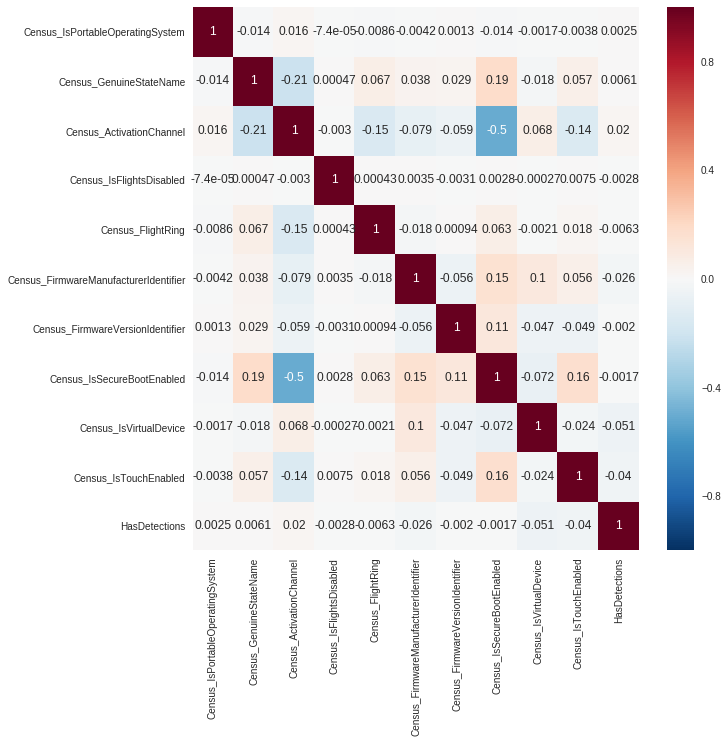

In [24]:
co_cols = cols[60:70]
for c in co_cols:
    print("Column name:",c,", data type:",train[c].dtypes)
co_cols.append('HasDetections')

plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


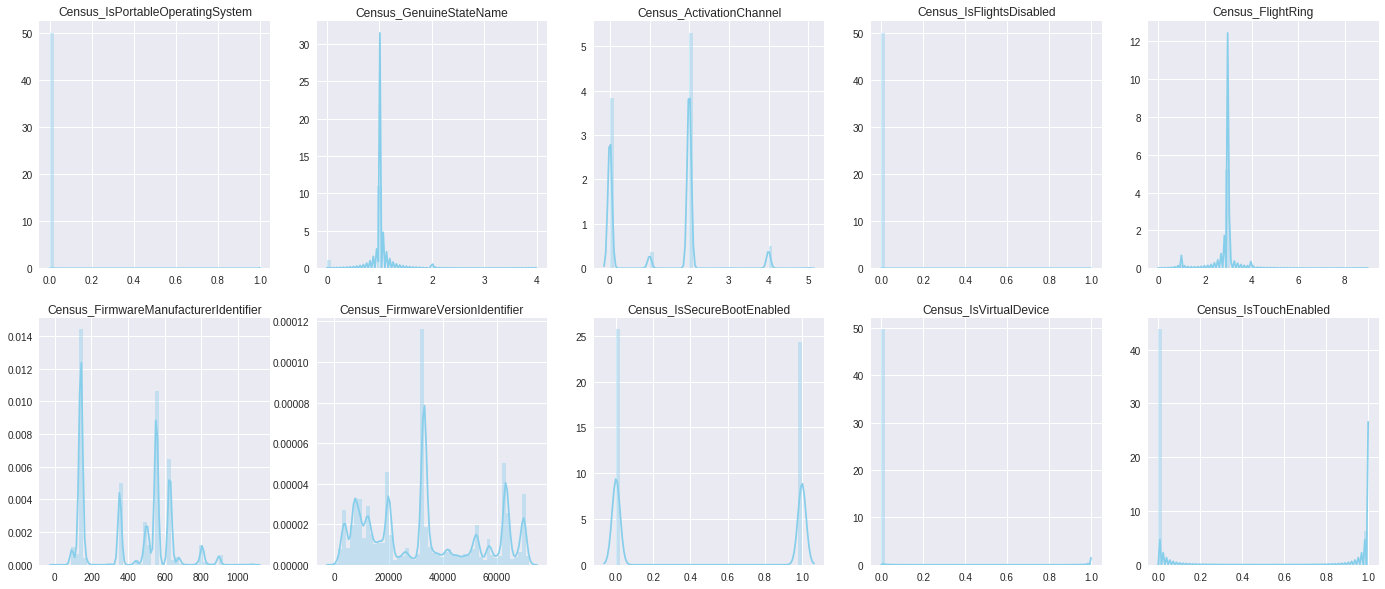

In [25]:
# plot
f, axes = plt.subplots(2, 5, figsize=(24, 10), sharex=False)
count = 0
for row in range(2):
    for col in range(5):
        try:
            sns.distplot(train[np.isfinite(train[co_cols[count]])][co_cols[count]].values, color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        except:
            sns.countplot(train[co_cols[count]], color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        count += 1

Things are looking good here for the 10 variables.

Column name: Census_IsPenCapable , data type: int8
Column name: Census_IsAlwaysOnAlwaysConnectedCapable , data type: float16
Column name: Wdft_IsGamer , data type: float16
Column name: Wdft_RegionIdentifier , data type: float16
Column name: HasDetections , data type: int8


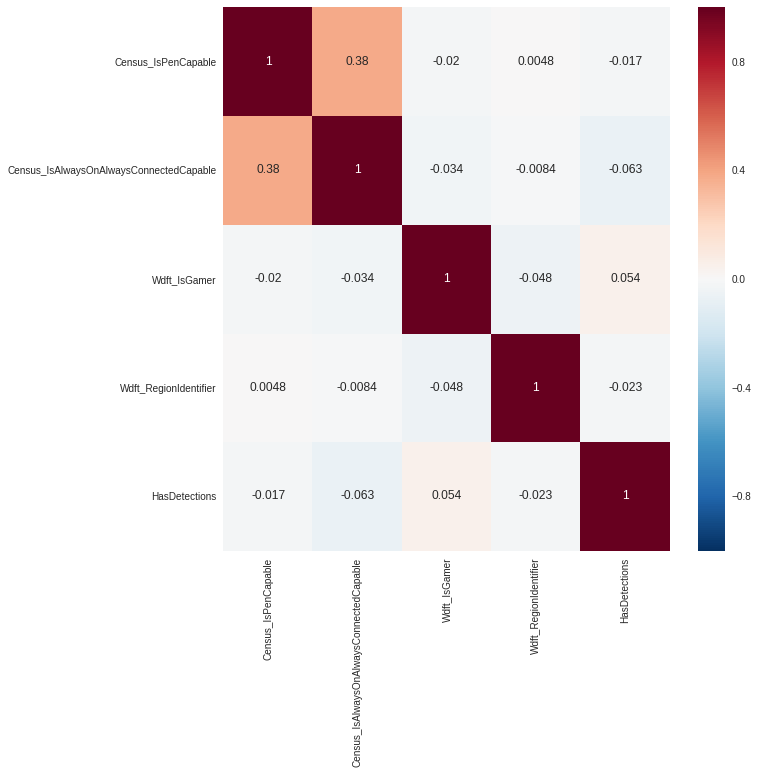

In [34]:
co_cols = cols[70:]
for c in co_cols:
    print("Column name:",c,", data type:",train[c].dtypes)

plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


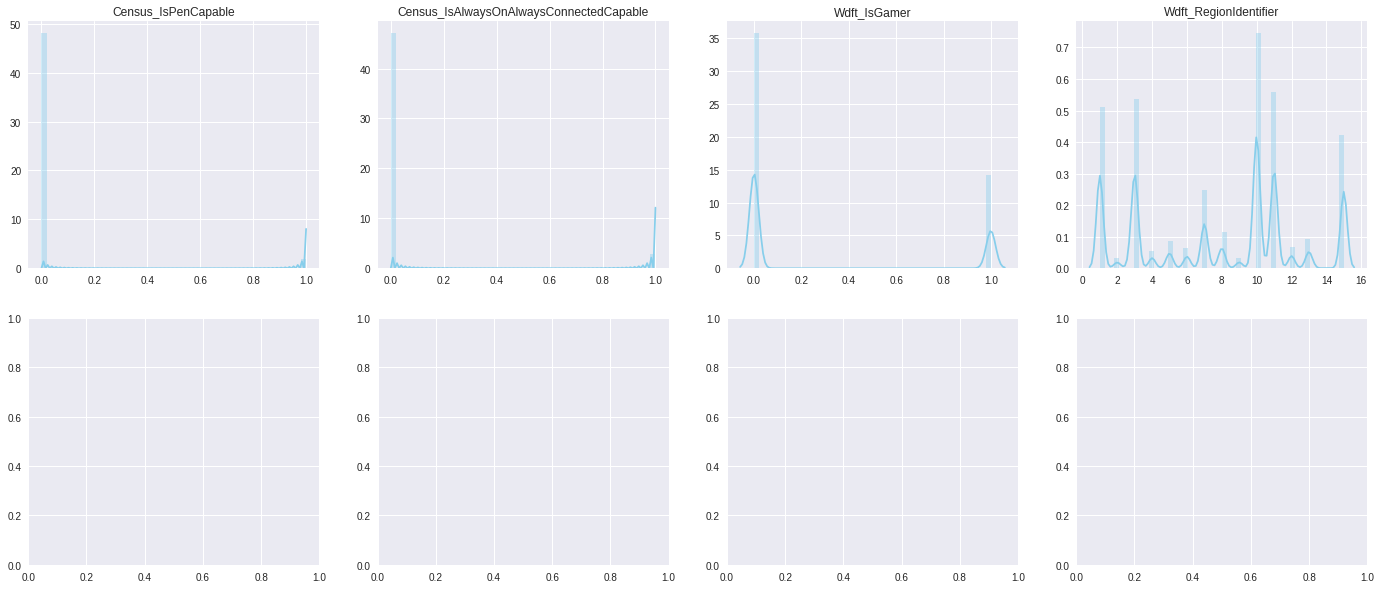

In [39]:
# plot
f, axes = plt.subplots(2, 4, figsize=(24, 10), sharex=False)
count = 0
for row in range(1):
    for col in range(4):
        try:
            sns.distplot(train[np.isfinite(train[co_cols[count]])][co_cols[count]].values, color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        except:
            sns.countplot(train[co_cols[count]], color="skyblue", ax=axes[row, col]).set_title(co_cols[count])
        count += 1

Seems to be no more variable to reduce here as well.

## Visualization 1st pass results

Looks like we can further eliminate these 7 variables:

* IsSxsPassiveMode
* Platform
* SkuEdition
* Census_ProcessorManufacturerIdentifier
* Census_InternalPrimaryDisplayResolutionVertical
* Census_OSSkuName
* Census_OSUILocaleIdentifier

Can do more feature engineering before actually training a model.

In [40]:
# Remove these variables from the training dataset
cols_to_drop = ["IsSxsPassiveMode","Platform","SkuEdition","Census_ProcessorManufacturerIdentifier","Census_InternalPrimaryDisplayResolutionVertical","Census_OSSkuName","Census_OSUILocaleIdentifier"]
train.drop(cols_to_drop, axis=1, inplace=True)
print(train.shape)

(8921483, 68)


So now we're left with 68 features.

# Further TODO

1. NANs - how to better handle those missing values? (Need a throughout investigation - will do in another notebook)
2. Skewed variables - how to fix their skewness?
3. More feature selection/combination - can we NOT drop features but map them into another space?
4. Algorithm improvement - the **real** meat and butter.

These issues should be addressed in another notebook.

# More Visualization....

This is the old version of my previous visualization efforts :) Trying to do it one-by-one (which is pretty slow, apparently).

## ProductName

In [0]:
def setCountOnTopOfBar(ax):
    for index in range(len(ax.axes[0])):
        for p in ax.axes[0][index].patches:
            height = p.get_height()
            ax.axes[0][index].text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height),
                    ha="center")

In [0]:
from matplotlib.pyplot import show

sns.set(style="darkgrid")
ax = sns.catplot(x="ProductName", col="HasDetections",
                 data=train, kind="count",
                 height=6, aspect=1.5)
setCountOnTopOfBar(ax)
show()

Looks like ProductName is not an informative feature itself... both groups are dominated by *win8defender*. The distributions of other versions are about the same.

## EngineVersion

A preliminary check shows that there are 70 engine versions in total. For the sake of time I will just visualize the top 5 here.

In [0]:
noDTop5 = train[(train['HasDetections'] == 0)].groupby(['EngineVersion']).size().sort_values(ascending=False)[:5]
print(noDTop5)
top5indexes = noDTop5.keys().tolist()
print("")
DTop5 = train[(train['HasDetections'] == 1)].groupby(['EngineVersion']).size()
DTop5sliced = DTop5[DTop5.index.isin(top5indexes)].reindex(top5indexes)
print(DTop5sliced)

In [0]:
# code: https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
# code: https://matplotlib.org/gallery/units/bar_unit_demo.html
N = len(top5indexes)
fig, ax = plt.subplots(figsize=(20,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, noDTop5.tolist(), width, color='r')
p2 = ax.bar(ind + width, DTop5sliced.tolist(), width, color='y')

ax.set_title('EngineVersion (top 5 measured by not affected computers)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(top5indexes)

ax.legend((p1[0], p2[0]), ('HasDetections = 0', 'HasDetections = 1'))
ax.autoscale_view()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(p1)
autolabel(p2)

plt.show()

Would there be a significant difference if we count the top 5 engine versions from the attacked computers?

In [0]:
DTop5 = train[(train['HasDetections'] == 1)].groupby(['EngineVersion']).size().sort_values(ascending=False)[:5]
print(DTop5)
top5indexes = DTop5.keys().tolist()
print("")
noDTop5 = train[(train['HasDetections'] == 0)].groupby(['EngineVersion']).size()
noDTop5sliced = noDTop5[noDTop5.index.isin(top5indexes)].reindex(top5indexes)
print(noDTop5sliced)

In [0]:
# code: https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
# code: https://matplotlib.org/gallery/units/bar_unit_demo.html
N = len(top5indexes)
fig, ax = plt.subplots(figsize=(20,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, noDTop5sliced.tolist(), width, color='r')
p2 = ax.bar(ind + width, DTop5.tolist(), width, color='y')

ax.set_title('EngineVersion (top 5 measured by affected computers)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(top5indexes)

ax.legend((p1[0], p2[0]), ('HasDetections = 0', 'HasDetections = 1'))
ax.autoscale_view()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(p1)
autolabel(p2)

plt.show()

So we do have a discrepency here: both 1.1.15100.1, 1.1.15200.1, and 1.1.15000.2 are popular versions among the safe and affected instances, but we have more unaffected computers under version 1.1.14901.4 and 1.1.14800.3, and more affected computers under version So we do have a discrepency here: both 1.1.15100.1, 1.1.15200.1, 1.1.15000.2 and 1.1.14901.4 are popular versions among the safe and affected instances, but we have more unaffected computers under version 1.1.14800.3, and more affected computers under version1.1.14600.4. Might be interesting if we are able to map this to actual time.

## AppVersion

In [0]:
fig, ax = plt.subplots(2,1,figsize=(16,10),squeeze=False)
sns.countplot(train[train['HasDetections'] == 0]['AppVersion'], ax=ax[0,0])
sns.countplot(train[train['HasDetections'] == 1]['AppVersion'], ax=ax[1,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90, ha="right")
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
fig.show()

The distribution of AppVersion between infected and normal computers are about the same. How about AvSigVersion?

## AvSigVersion

Code for visualization is available below; however, since there are 8531 records in total, it's really hard to visualize the end result. Looks like it's a even finer-grain defined feature, so might be useful if we decide to map to concrete time.

In [0]:
avsigcheck = train[(train['HasDetections'] == 0)].groupby(['AvSigVersion']).size().sort_values(ascending=False)
print(avsigcheck.size)
#fig, ax = plt.subplots(2,1,figsize=(16,10),squeeze=False)
#sns.countplot(train[train['HasDetections'] == 0]['AvSigVersion'], ax=ax[0,0])
#sns.countplot(train[train['HasDetections'] == 1]['AvSigVersion'], ax=ax[1,0])
#ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90, ha="right")
#ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90, ha="right")
#plt.tight_layout()
#fig.show()

## IsBeta

A quick check below shows that **IsBeta** is also dominated by 0 (that is, most of the machines are not Beta version). It's a highly skewed distribution for sure. As for the 67 machines that is beta, how many of them are infected (or not)?

In [0]:
isBetaSeries = train.groupby(['IsBeta']).size().sort_values(ascending=False)
print(isBetaSeries)
sns.countplot(train['IsBeta'])

In [0]:
isBetaSeries = train[train['IsBeta'] == 1].groupby(['HasDetections']).size().sort_values(ascending=False)
print(isBetaSeries)
sns.countplot(train[train['IsBeta'] == 1]['HasDetections'],palette="Set3").set_title('IsBeta')

So even if a machine has beta version, its likelihood of getting infected based on the data seems to be 50/50. 

Let's quickly check some variables that deem to be "NA" in the data description and see if we can make sense of them.

## "NA" variables???

The following 19 variables have no description:

* RtpStateBitfield
* IsSxsPassiveMode
* AVProductsInstalled
* AVProductsEnabled
* IeVerIdentifier
* Census_OEMNameIdentifier
* Census_OEMModelIdentifier
* Census_ProcessorManufacturerIdentifier
* Census_ProcessorModelIdentifier
* Census_InternalBatteryType
* Census_InternalBatteryNumberOfCharges
* Census_OSInstallLanguageIdentifier
* Census_OSUILocaleIdentifier
* Census_IsFlightingInternal
* Census_ThresholdOptIn
* Census_FirmwareManufacturerIdentifier
* Census_FirmwareVersionIdentifier
* Census_IsWIMBootEnabled
* Wdft_RegionIdentifier

In [0]:
RtpStateBitfieldSeries = train.groupby(['RtpStateBitfield']).size().sort_values(ascending=False)
print(RtpStateBitfieldSeries)
print("Note: number of NANs:",train['RtpStateBitfield'].isnull().sum())

In [0]:
# looks like 35.0 is an outlier, but can't say for sure now
sns.distplot(train[np.isfinite(train['RtpStateBitfield'])]['RtpStateBitfield'].values).set_title('RtpStateBitfield');

In [0]:
IsSxsPassiveModeSeries = train.groupby(['IsSxsPassiveMode']).size().sort_values(ascending=False)
print(IsSxsPassiveModeSeries)
print("Note: number of NANs:",train['IsSxsPassiveMode'].isnull().sum())

In [0]:
ax = sns.catplot(x="IsSxsPassiveMode", col="HasDetections",
                 data=train, kind="count",
                 height=6, aspect=1.5)
countOverCountPlot(ax)
show()

In [0]:
AVProductsInstalledSeries = train.groupby(['AVProductsInstalled']).size().sort_values(ascending=False)
print(AVProductsInstalledSeries)
print("Note: number of NANs:",train['AVProductsInstalled'].isnull().sum())

In [0]:
sns.distplot(train[np.isfinite(train['AVProductsInstalled'])]['AVProductsInstalled'].values, kde=False).set_title('AVProductsInstalled');

In [0]:
AVProductsEnabledSeries = train.groupby(['AVProductsEnabled']).size().sort_values(ascending=False)
print(AVProductsEnabledSeries)
print("Size:",AVProductsEnabledSeries.shape)
print("Note: number of NANs:",train['AVProductsEnabled'].isnull().sum())

In [0]:
sns.distplot(train[np.isfinite(train['AVProductsEnabled'])]['AVProductsEnabled'].values, kde=False).set_title('AVProductsEnabled');

In [0]:
IeVerIdentifierSeries = train.groupby(['IeVerIdentifier']).size().sort_values(ascending=False)
print(IeVerIdentifierSeries.head())
print("Size:",IeVerIdentifierSeries.shape)
print("Note: number of NANs:",train['IeVerIdentifier'].isnull().sum())

In [0]:
sns.distplot(train[np.isfinite(train['IeVerIdentifier'])]['IeVerIdentifier'].values, kde=False).set_title('IeVerIdentifier');

In [0]:
ax = sns.catplot(x="IeVerIdentifier", col="HasDetections",
                 data=train[np.isfinite(train['IeVerIdentifier'])], kind="count",
                 height=6, aspect=1.5)
setCountOnTopOfBar(ax)
show()